In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#importing data
data_train=pd.read_csv("train.csv")

In [3]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data_train.shape

(14999, 9)

In [5]:
data_train.describe(include='all')

,vidid,adview,views,likes,dislikes,comment,published,duration,category
count,14999,1.499900e+04,14999,14999,14999,14999,14999,14999,14999
unique,14999,NaN,14588,4789,1546,2007,2386,3146,8
top,VID_18655,NaN,885,1,0,0,2016-08-26,PT31S,D
freq,1,NaN,4,174,1091,1290,42,147,7558
mean,NaN,2.107791e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.237711e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [7]:
data_train=data_train.drop(["vidid"],axis=1) ##Vidid column not required

In [8]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [9]:
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,1,666,1,0,0,2016-06-29,PT31S,D


In [10]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)

In [11]:
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,1,666,1,0,0,2016-06-29,PT31S,4


In [12]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   adview     14637 non-null  int64 
 1   views      14637 non-null  int64 
 2   likes      14637 non-null  int64 
 3   dislikes   14637 non-null  int64 
 4   comment    14637 non-null  int64 
 5   published  14637 non-null  object
 6   duration   14637 non-null  object
 7   category   14637 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.0+ MB


In [14]:
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,1,666,1,0,0,2016-06-29,PT31S,4


In [15]:
data_train.describe(include='all')

,adview,views,likes,dislikes,comment,published,duration,category
count,1.463700e+04,1.463700e+04,14637.000000,14637.000000,14637.000000,14637,14637,14637.000000
unique,NaN,NaN,NaN,NaN,NaN,2384,3078,NaN
top,NaN,NaN,NaN,NaN,NaN,2016-08-26,PT31S,NaN
freq,NaN,NaN,NaN,NaN,NaN,40,133,NaN
mean,2.066030e+03,7.112280e+05,2785.841293,254.429391,409.135547,NaN,NaN,4.607228
std,5.282706e+04,2.731475e+06,8938.490736,1029.774864,1511.176934,NaN,NaN,1.576312
min,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,NaN,NaN,1.000000
25%,1.000000e+00,3.151700e+04,88.000000,7.000000,7.000000,NaN,NaN,4.000000
50%,2.000000e+00,1.586680e+05,450.000000,38.000000,46.000000,NaN,NaN,4.000000
75%,6.000000e+00,5.836130e+05,1863.000000,167.000000,224.000000,NaN,NaN,6.000000


In [16]:
data_train.isnull().sum()

adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [17]:
data_train["published"]=pd.to_datetime(data_train["published"])

data_train["Day"]=data_train["published"].dt.day
data_train["Month"]=data_train["published"].dt.month
data_train["Year"]=data_train["published"].dt.year

data_train.drop("published",axis=1,inplace=True) ##dropping the published feature

In [18]:
!pip install sweetviz
import sweetviz as sv

You should consider upgrading via the 'C:\Users\BIRENDRA MANDAL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [19]:
advert_report = sv.analyze(data_train)
advert_report.show_html('Report.html')

C:\Users\BIRENDRA MANDAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\BIRENDRA MANDAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                                 | [  0%]   00:0…

C:\Users\BIRENDRA MANDAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\BIRENDRA MANDAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\BIRENDRA MANDAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\BIRENDRA MANDAL\AppData\Local\Programs\Python\Python310

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
# Encoding features like Published
#from sklearn.preprocessing import LabelEncoder
#data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [21]:
data_train['duration'].dtype

dtype('O')

In [22]:
data_train.head()

,adview,views,likes,dislikes,comment,duration,category,Day,Month,Year
0,40,1031602,8523,363,1095,PT7M37S,6,14,9,2016
1,2,1707,56,2,6,PT9M30S,4,1,10,2016
2,1,2023,25,0,2,PT2M16S,3,2,7,2016
3,6,620860,777,161,153,PT4M22S,8,27,7,2016
4,1,666,1,0,0,PT31S,4,29,6,2016


In [23]:
# Convert Time_in_sec for duration
import datetime
import time

In [24]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp


In [25]:
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

In [26]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [27]:
time1=time.apply(func_sec)
data_train["duration"]=time1

In [28]:
data_train.head()

,adview,views,likes,dislikes,comment,duration,category,Day,Month,Year
0,40,1031602,8523,363,1095,457,6,14,9,2016
1,2,1707,56,2,6,570,4,1,10,2016
2,1,2023,25,0,2,136,3,2,7,2016
3,6,620860,777,161,153,262,8,27,7,2016
4,1,666,1,0,0,31,4,29,6,2016


In [29]:
data_train['duration'].dtype

dtype('int64')

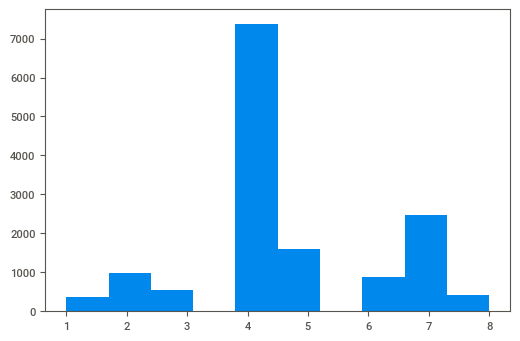

In [30]:
plt.hist(data_train["category"])
plt.show()

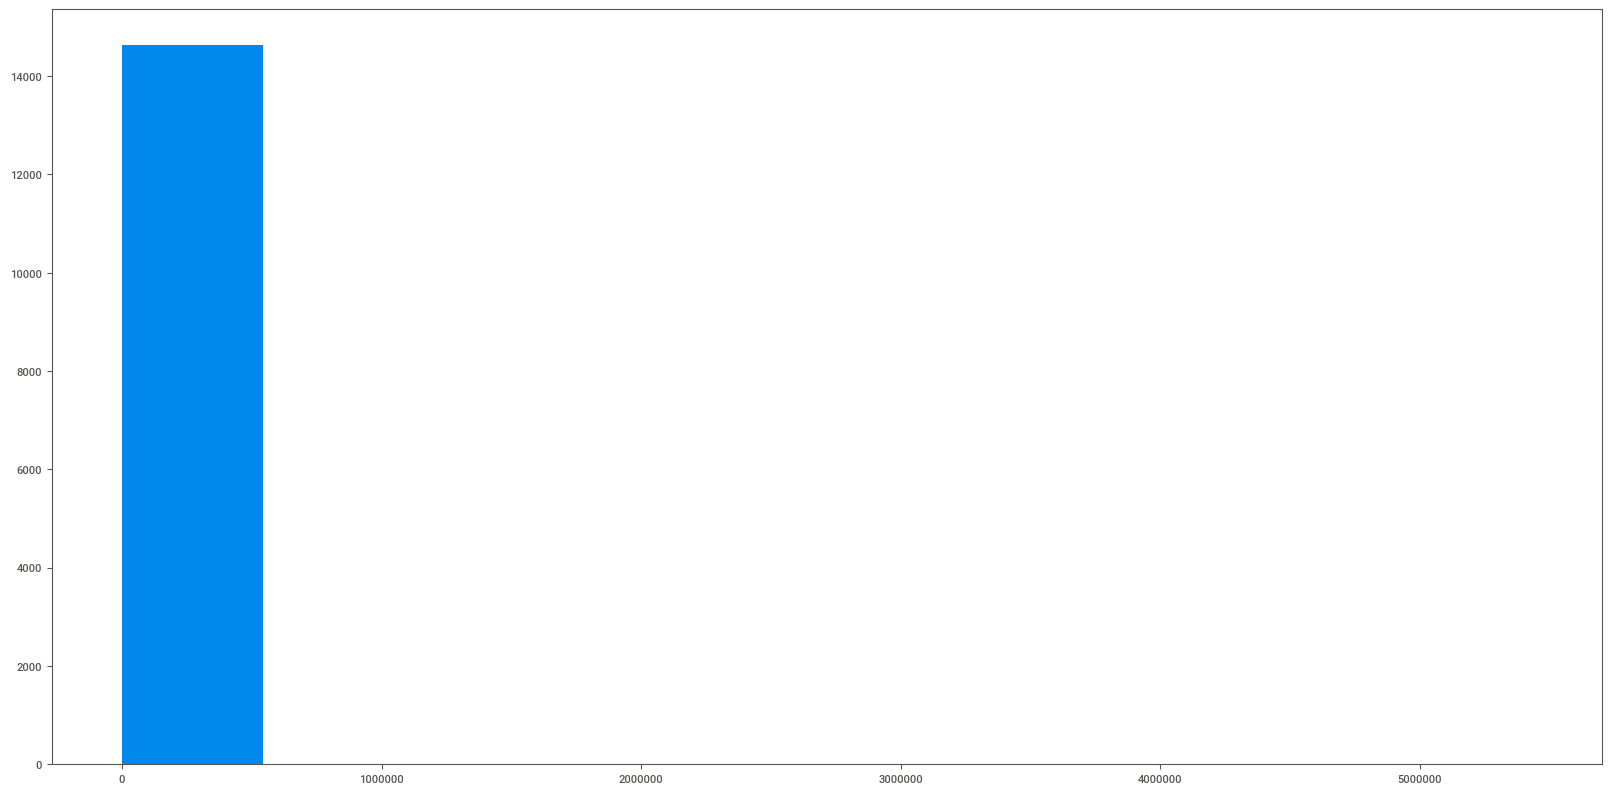

In [31]:
plt.figure(figsize=(20,10))
plt.hist(data_train["adview"])
plt.show()

In [32]:
# Remove videos with adview greater than 0.5M as outlier
data_train = data_train[data_train["adview"] <500000]

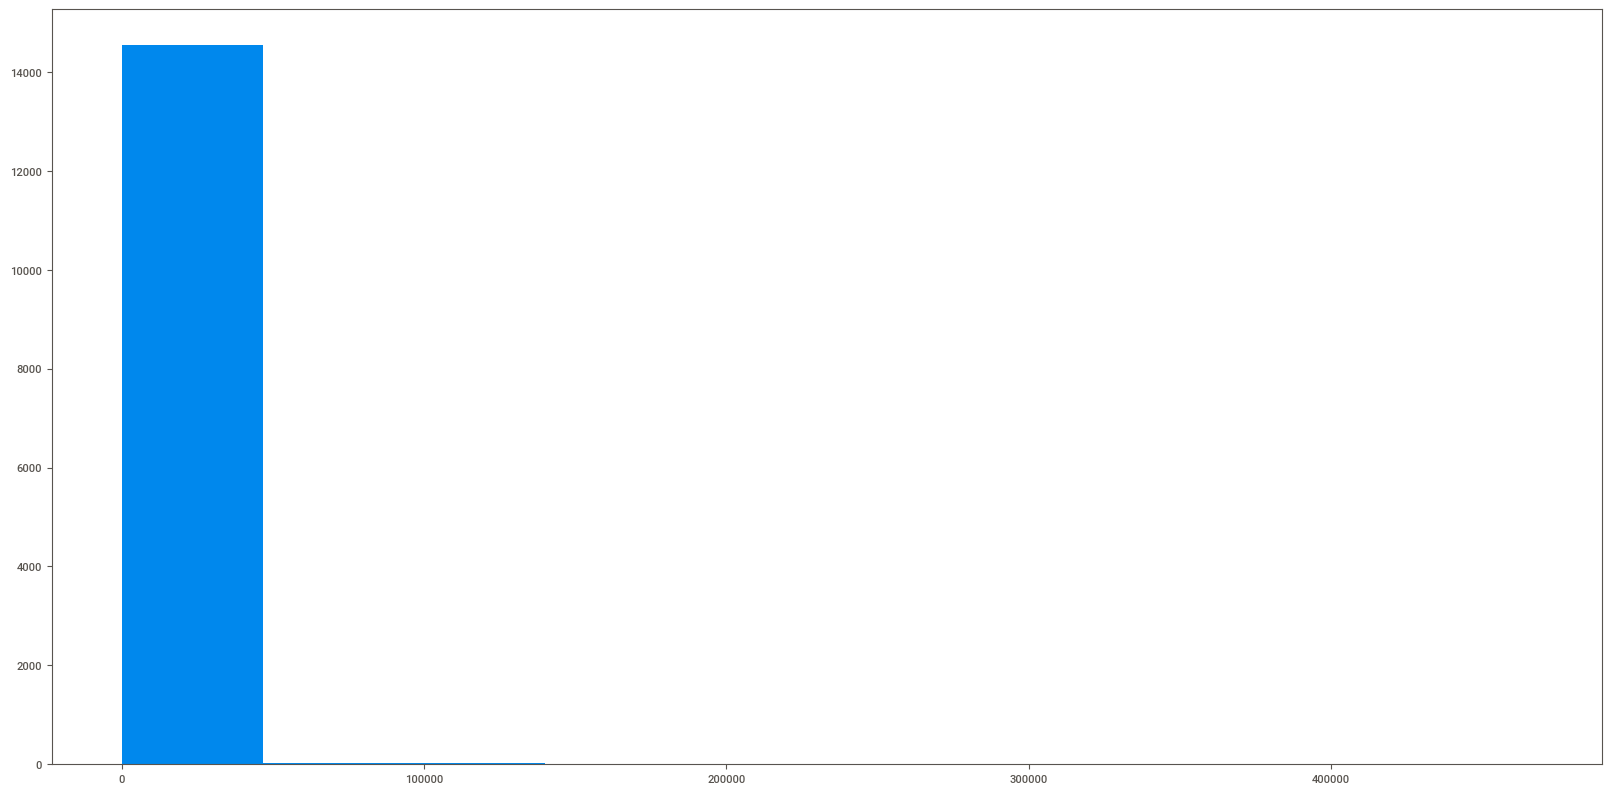

In [33]:
plt.figure(figsize=(20,10))
plt.hist(data_train["adview"])
plt.show()

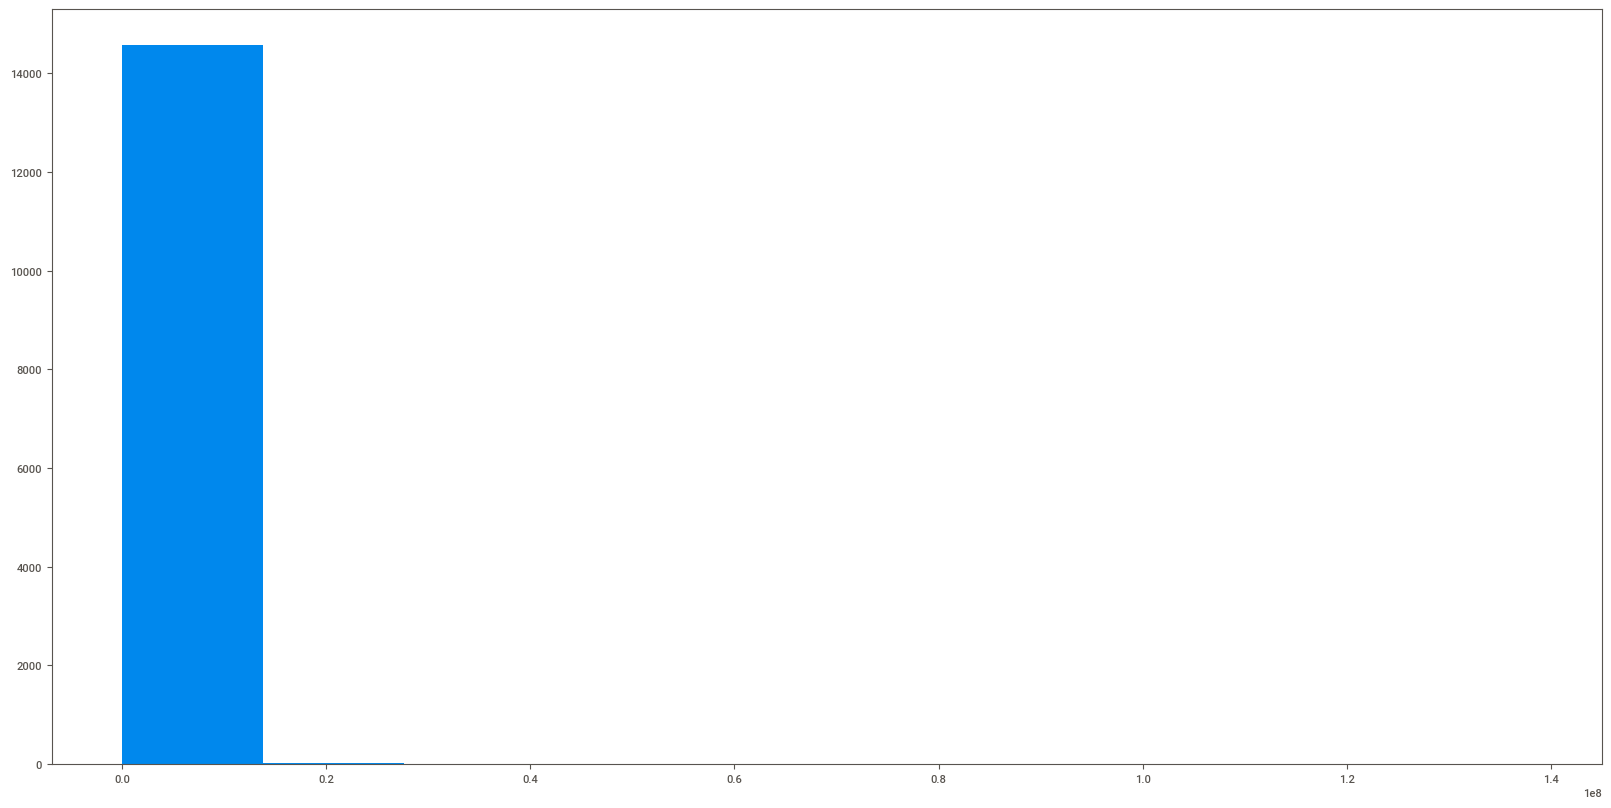

In [34]:
plt.figure(figsize=(20,10))
plt.hist(data_train["views"])
plt.show()

In [35]:
# Remove videos with views greater than 1.4M as outlier
data_train = data_train[data_train["views"] <1400000]

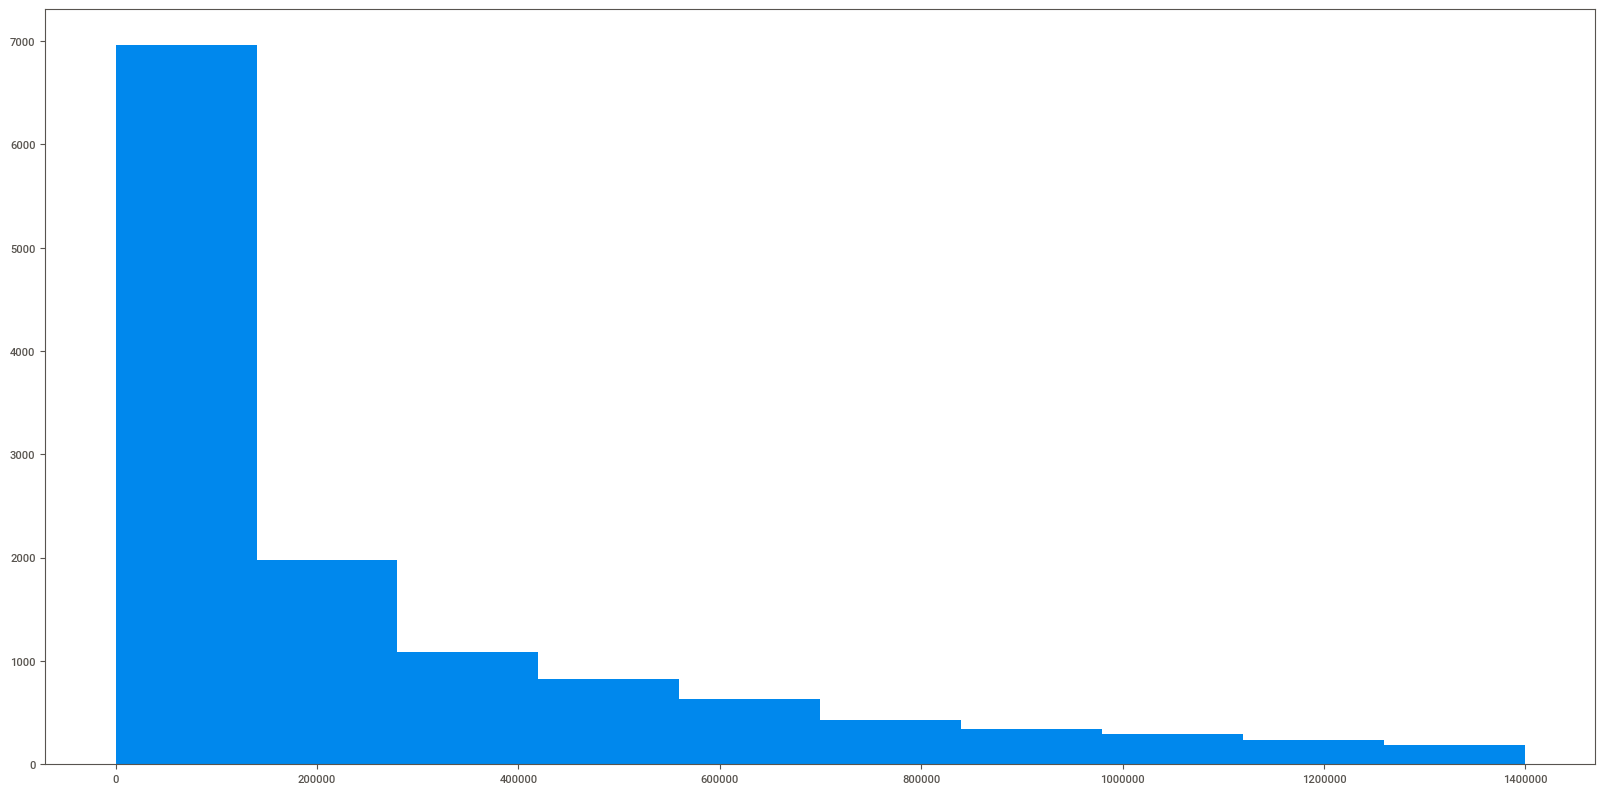

In [36]:
plt.figure(figsize=(20,10))
plt.hist(data_train["views"])
plt.show()

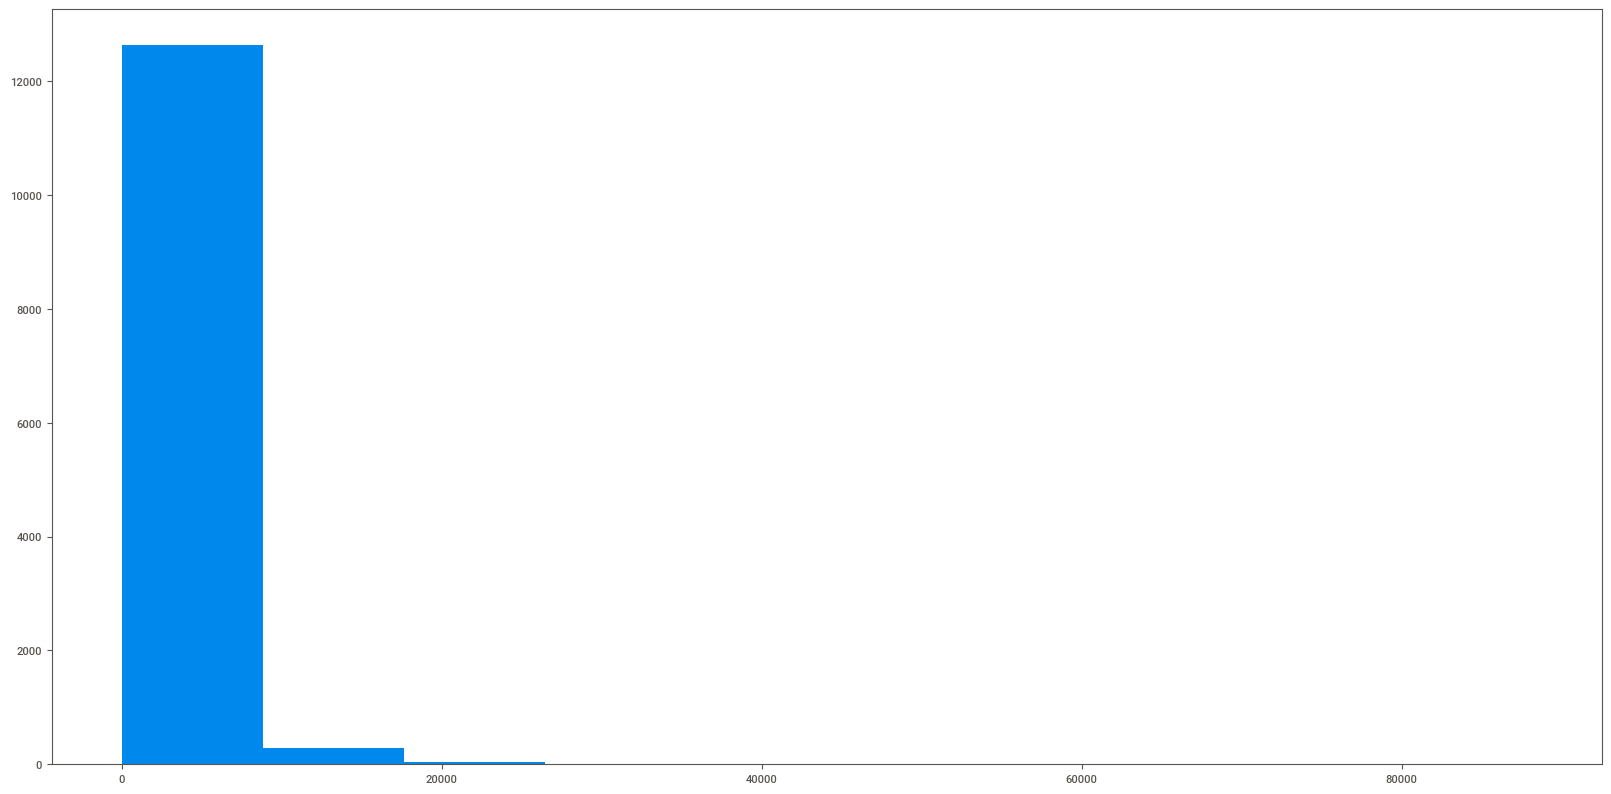

In [37]:
plt.figure(figsize=(20,10))
plt.hist(data_train["likes"])
plt.show()

In [38]:
# Remove videos with likes greater than 5k as outlier
data_train = data_train[data_train["likes"] <4000]

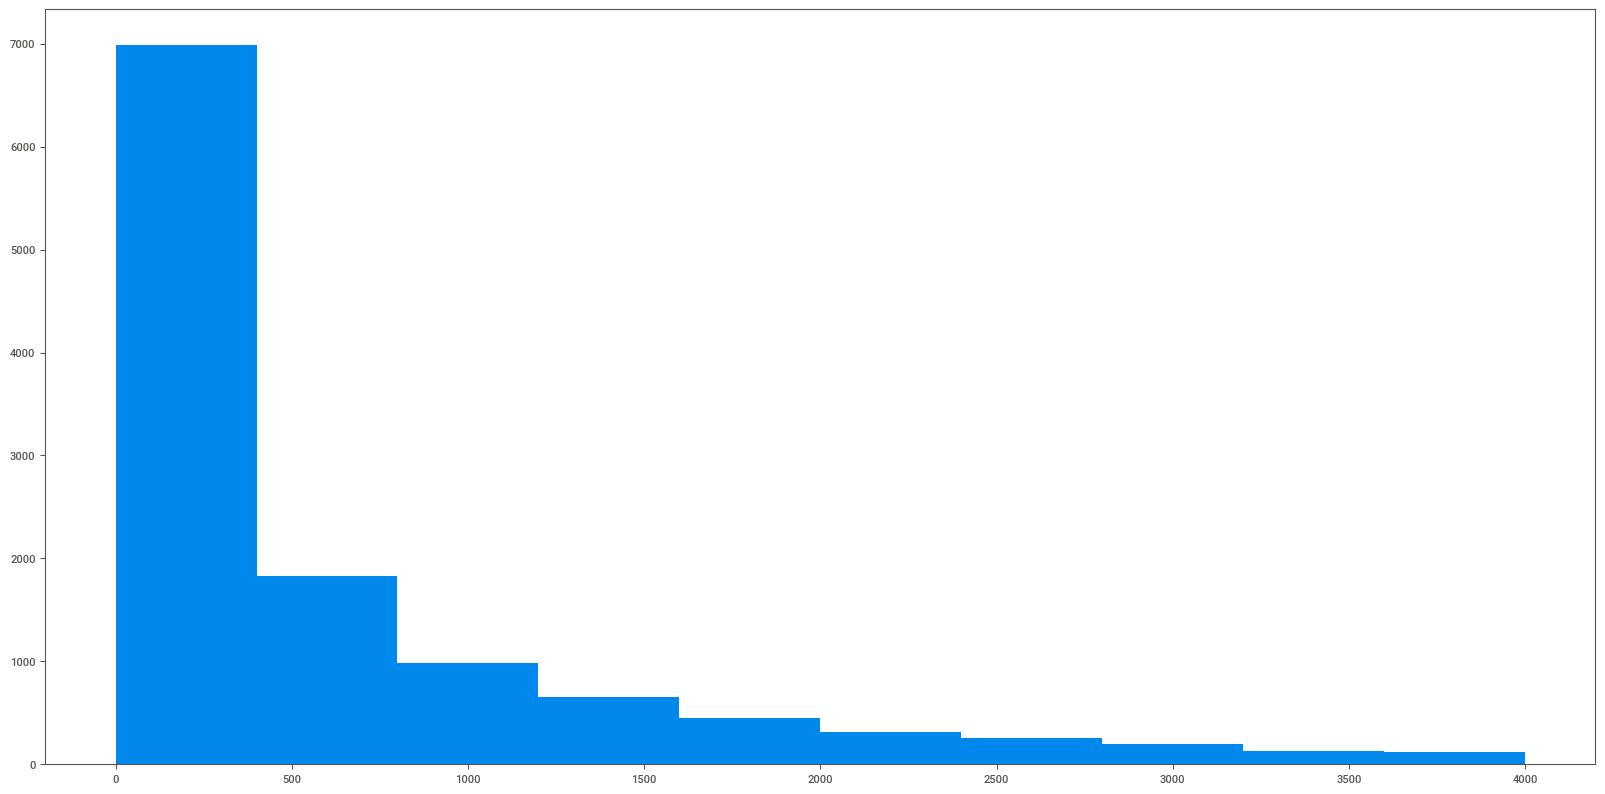

In [39]:
plt.figure(figsize=(20,10))
plt.hist(data_train["likes"])
plt.show()

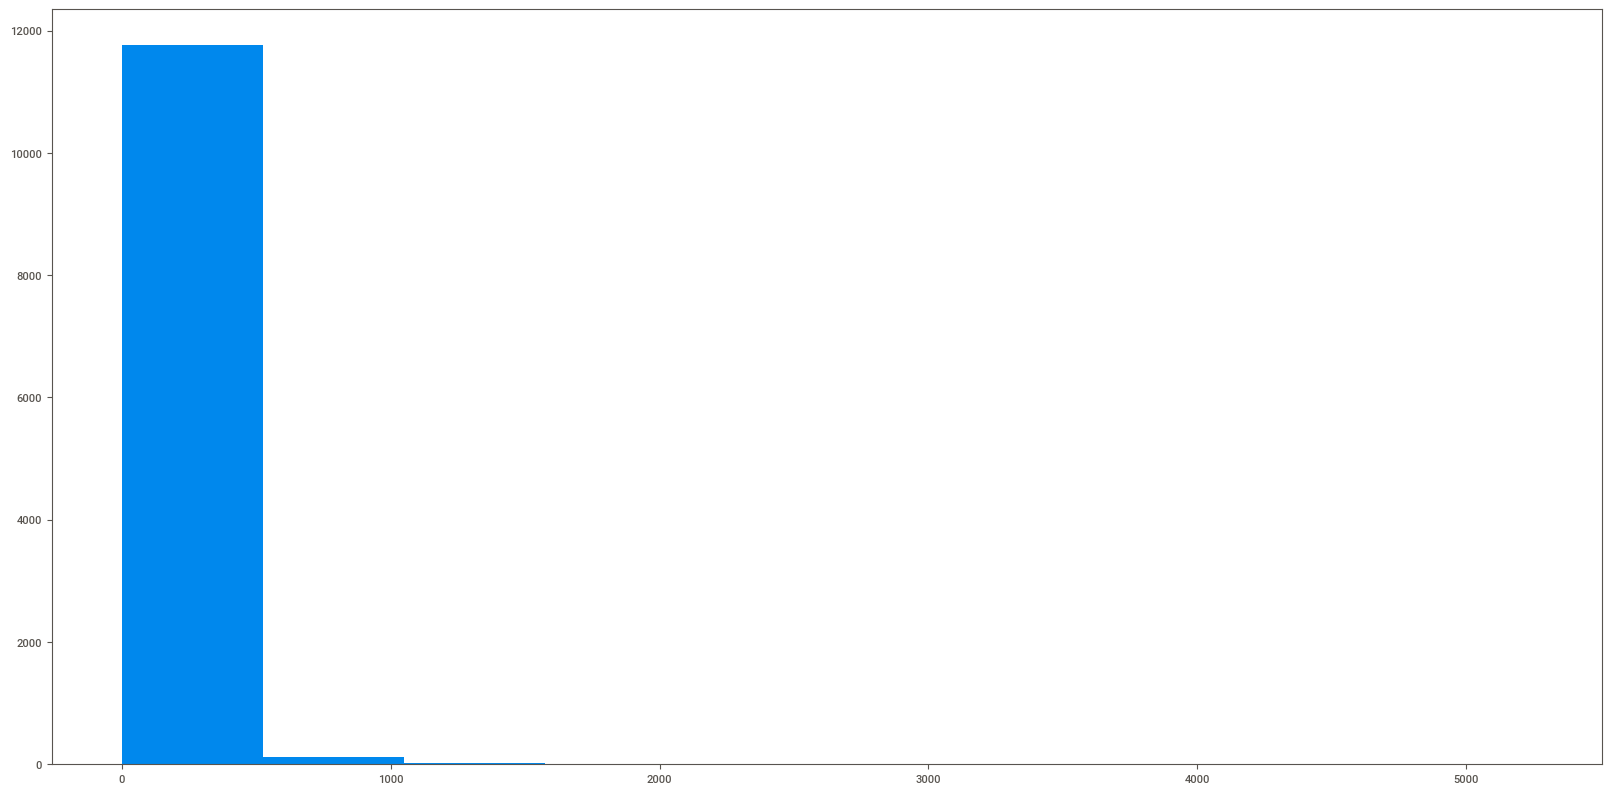

In [40]:
plt.figure(figsize=(20,10))
plt.hist(data_train["dislikes"])
plt.show()

In [41]:
# Remove videos with dislikes greater than 500 as outlier
data_train = data_train[data_train["dislikes"] <250]

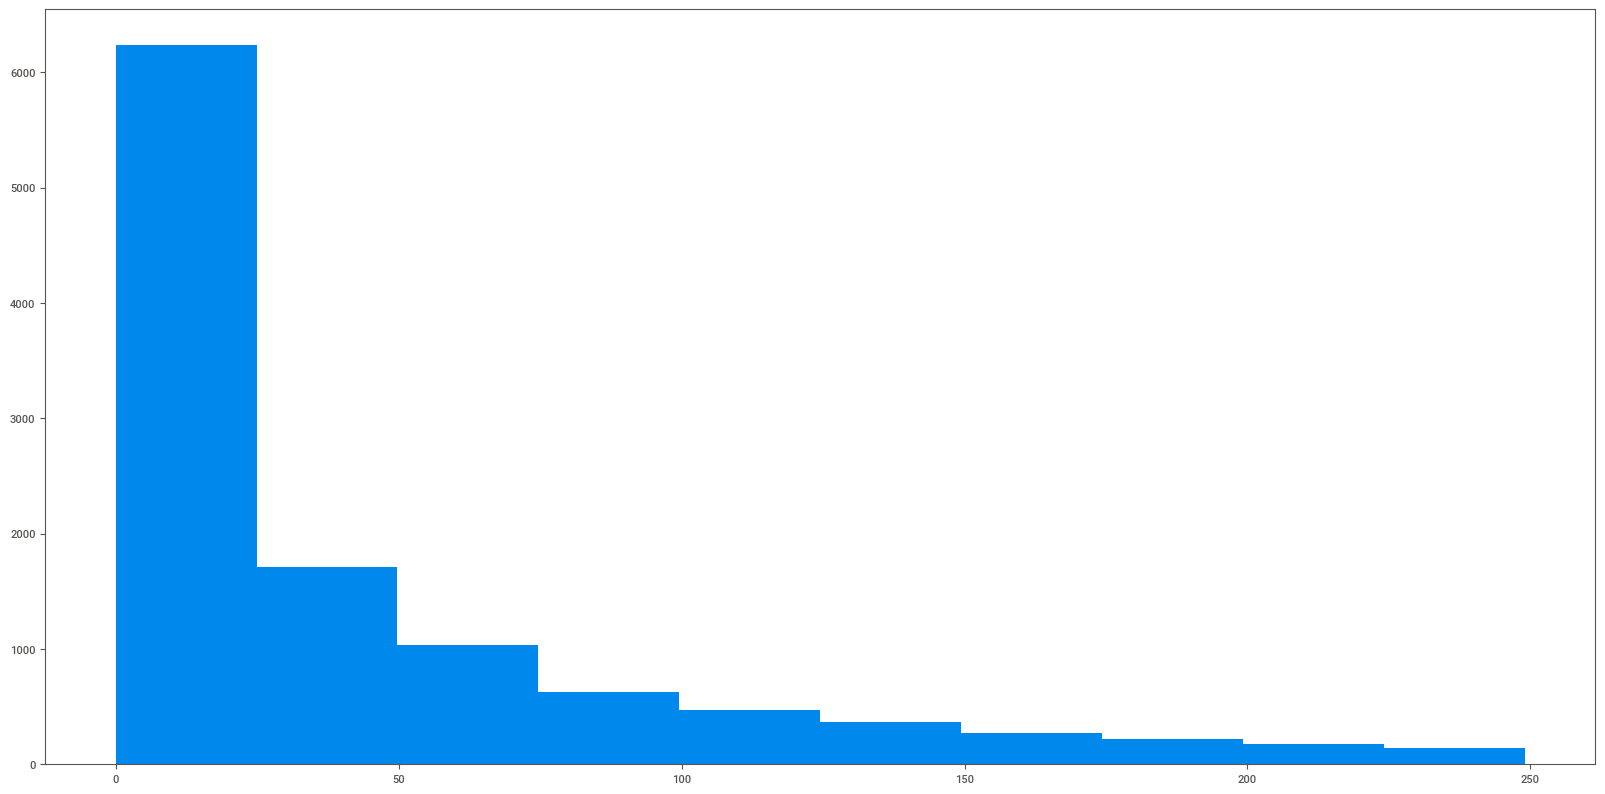

In [42]:
plt.figure(figsize=(20,10))
plt.hist(data_train["dislikes"])
plt.show()

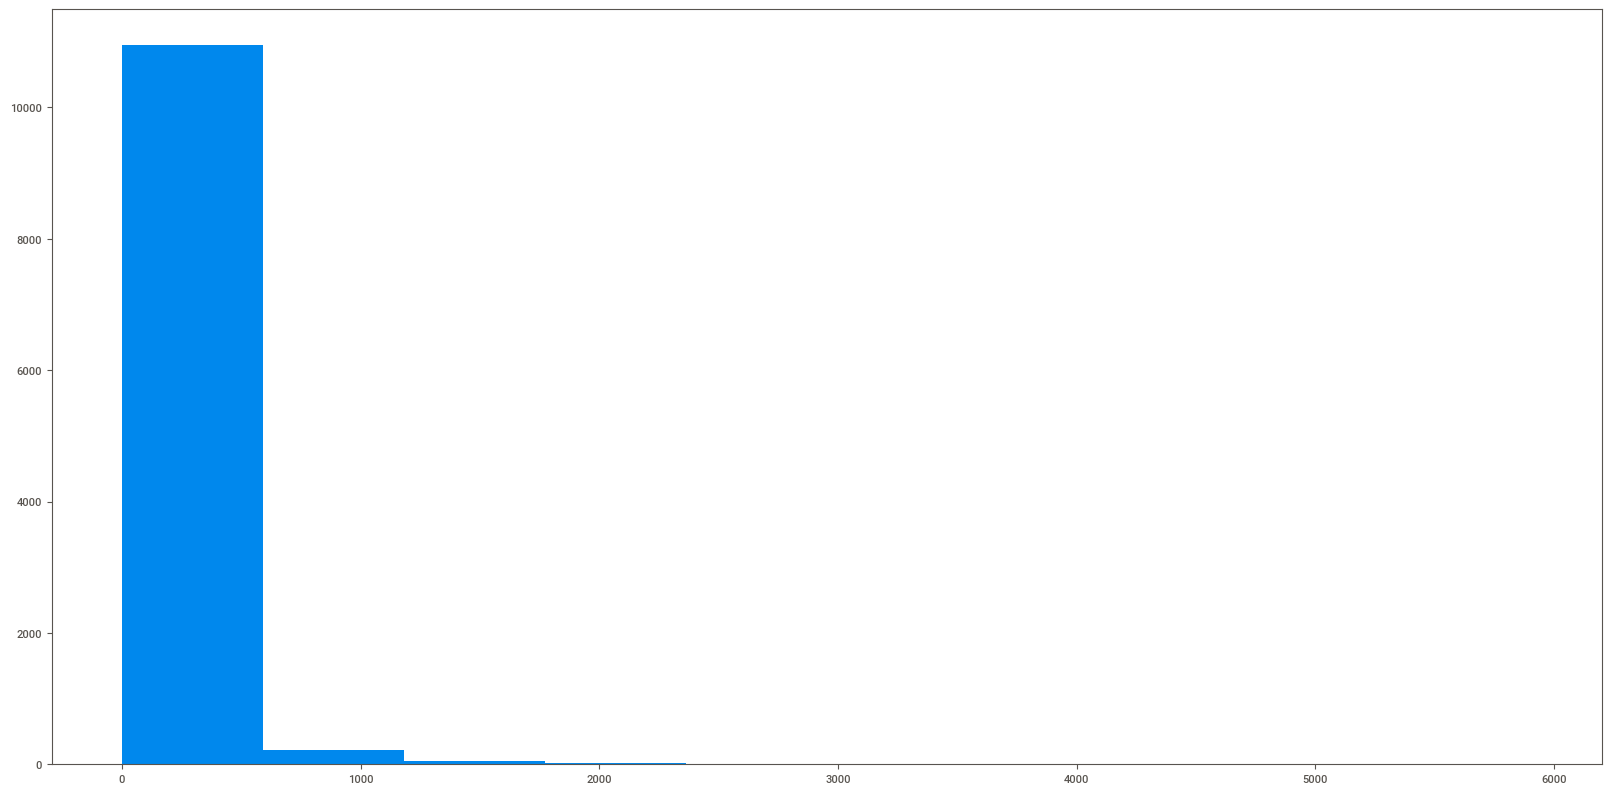

In [43]:
plt.figure(figsize=(20,10))
plt.hist(data_train["comment"])
plt.show()

In [44]:
# Remove videos with comments greater than 350 as outlier
data_train = data_train[data_train["comment"] <400]

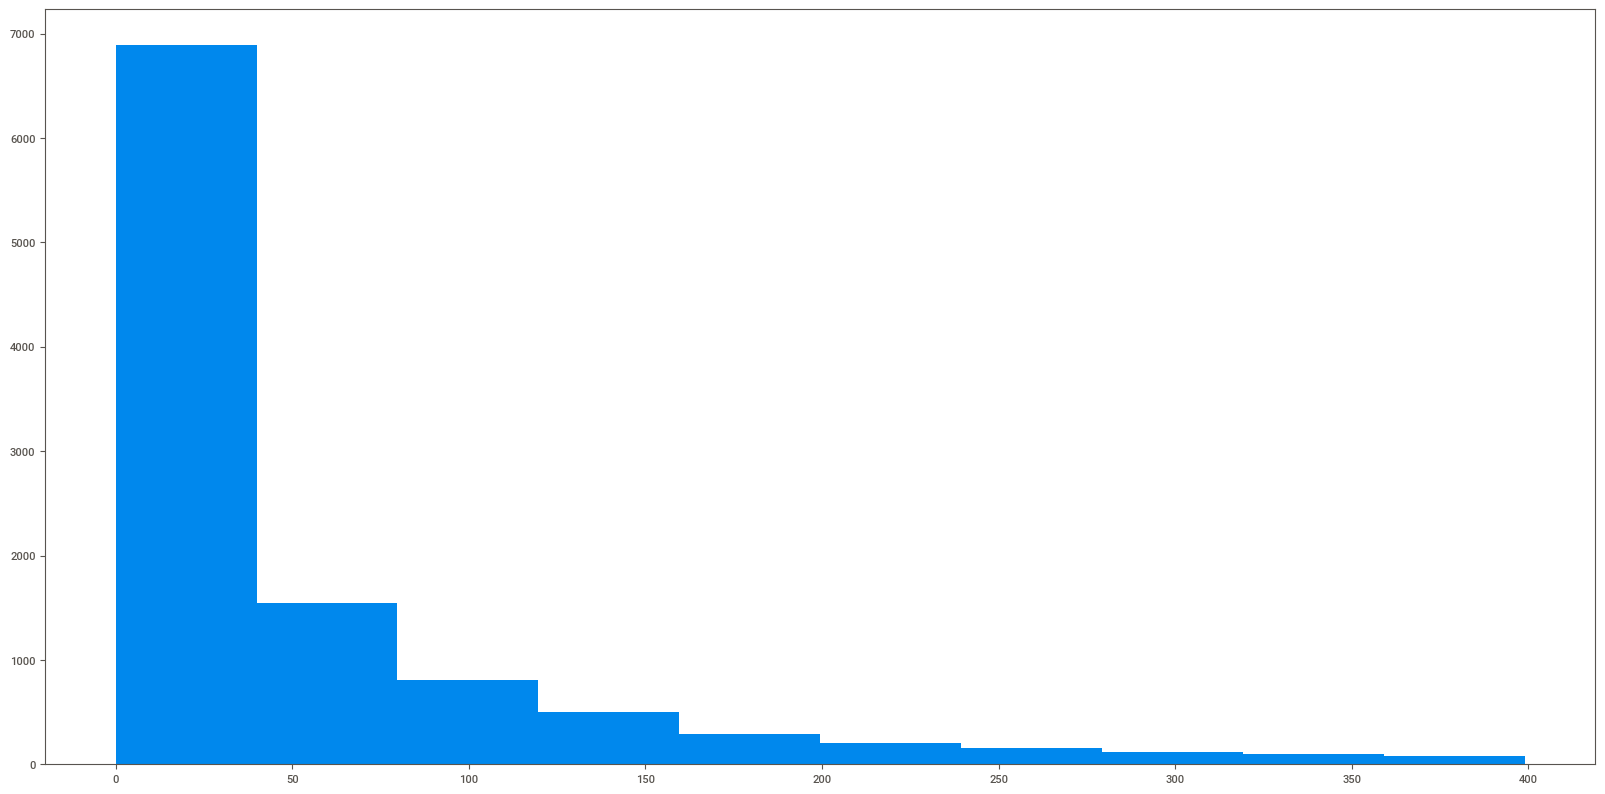

In [45]:
plt.figure(figsize=(20,10))
plt.hist(data_train["comment"])
plt.show()

<Axes: >

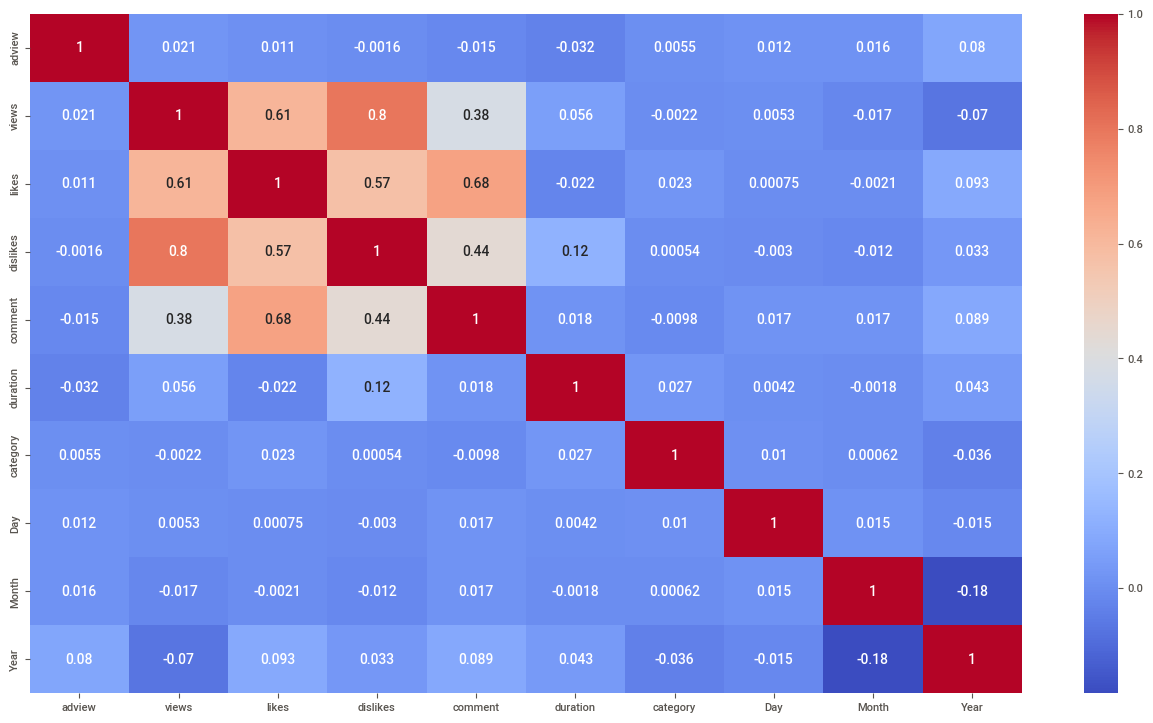

In [46]:
plt.figure(figsize=(16,9))
sns.heatmap(data_train.corr(),annot=True,cmap="coolwarm")

In [47]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 1 to 14998
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   adview    10683 non-null  int64
 1   views     10683 non-null  int64
 2   likes     10683 non-null  int64
 3   dislikes  10683 non-null  int64
 4   comment   10683 non-null  int64
 5   duration  10683 non-null  int64
 6   category  10683 non-null  int64
 7   Day       10683 non-null  int64
 8   Month     10683 non-null  int64
 9   Year      10683 non-null  int64
dtypes: int64(10)
memory usage: 918.1 KB


In [48]:
data_train.head()

,adview,views,likes,dislikes,comment,duration,category,Day,Month,Year
1,2,1707,56,2,6,570,4,1,10,2016
2,1,2023,25,0,2,136,3,2,7,2016
3,6,620860,777,161,153,262,8,27,7,2016
4,1,666,1,0,0,31,4,29,6,2016
5,4,78,0,0,0,15,4,9,5,2016


In [49]:
# Split Data
Y = data_train["adview"]
X = data_train.drop(["adview"],axis=1)
X.head()

,views,likes,dislikes,comment,duration,category,Day,Month,Year
1,1707,56,2,6,570,4,1,10,2016
2,2023,25,0,2,136,3,2,7,2016
3,620860,777,161,153,262,8,27,7,2016
4,666,1,0,0,31,4,29,6,2016
5,78,0,0,0,15,4,9,5,2016


In [50]:
Y.head()

1    2
2    1
3    6
4    1
5    4
Name: adview, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (8546, 9)
Shape of y_train :  (8546,)
Shape of X_test :  (2137, 9)
Shape of y_test :  (2137,)


In [52]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [53]:
X_train.mean()

0.3161827469433828

In [54]:
# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def print_error(y_true, y_pred):
            print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
            print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
            print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
            print('R2 Score : ',r2_score(y_test, y_pred))

In [55]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_lr=linear_regression.predict(X_test)
print_error(y_test, y_pred_lr)

Mean Absolute Error: 2724.0424970009944
Mean Squared Error: 125444850.70281903
Root Mean Squared Error: 11200.21654713957
R2 Score :  0.0021635153622544534


In [56]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
y_pred_svr=supportvector_regressor .predict(X_test)
print_error(y_test, y_pred_svr)

Mean Absolute Error: 1259.5487131694742
Mean Squared Error: 127302313.61680104
Root Mean Squared Error: 11282.832694709296
R2 Score :  -0.01261145749672421


In [57]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred_dtr=decision_tree.predict(X_test)
print_error(y_test, y_pred_dtr)

Mean Absolute Error: 2000.6102012166589
Mean Squared Error: 205597997.2540945
Root Mean Squared Error: 14338.688826182626
R2 Score :  -0.6354053727928448


In [58]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
y_pred_rfr= random_forest.predict(X_test)
print_error(y_test, y_pred_rfr)

Mean Absolute Error: 1988.478516612073
Mean Squared Error: 120654018.78467537
Root Mean Squared Error: 10984.262323191093
R2 Score :  0.04027163102350062


In [59]:
from xgboost import XGBRegressor
xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
print_error(y_test, y_pred_xgbr)

Mean Absolute Error: 2214.012259416174
Mean Squared Error: 125462298.65049466
Root Mean Squared Error: 11200.995431232648
R2 Score :  0.002024727690419059
